# REGRESSION
## [Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

 instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Data Loading and Visualization

In [0]:
data = pd.read_csv('hour.csv', encoding= 'unicode_escape')

In [0]:
y = data['cnt']

In [0]:
X = data.drop(['cnt', 'dteday'], axis=1)

In [11]:
X = X.mask(np.random.random(X.shape) < .07)
X.isna().mean().round(4)*100

instant       7.07
season        6.89
yr            7.27
mnth          6.96
hr            7.11
holiday       7.30
weekday       6.36
workingday    6.92
weathersit    7.37
temp          7.07
atemp         7.16
hum           7.38
windspeed     7.07
casual        6.59
registered    7.18
dtype: float64

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
instant       16150 non-null float64
season        16182 non-null float64
yr            16115 non-null float64
mnth          16169 non-null float64
hr            16143 non-null float64
holiday       16111 non-null float64
weekday       16273 non-null float64
workingday    16176 non-null float64
weathersit    16098 non-null float64
temp          16150 non-null float64
atemp         16134 non-null float64
hum           16096 non-null float64
windspeed     16151 non-null float64
casual        16234 non-null float64
registered    16131 non-null float64
dtypes: float64(15)
memory usage: 2.0 MB


In [0]:
data_n = pd.DataFrame(X)
data_n["cnt"] = y

In [ ]:
#The average count is (). The minimum count is () and maximum is (). The maximum count appears to be outlier

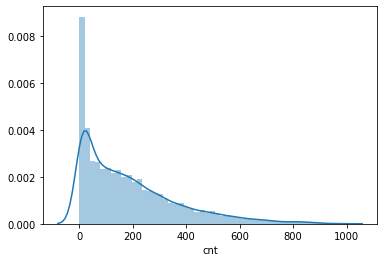

In [14]:
sns.distplot(data_n['cnt'])

In [ ]:
#The above plot doesn't look like a normal distribution, seems there are some outliers in the data.

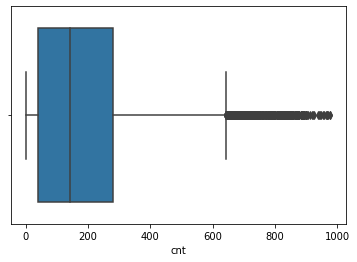

In [15]:
sns.boxplot(data_n['cnt'])

In [ ]:
#From the above plot, we can see that there are outliers i.e Count > (620). So, it's better to delete them.

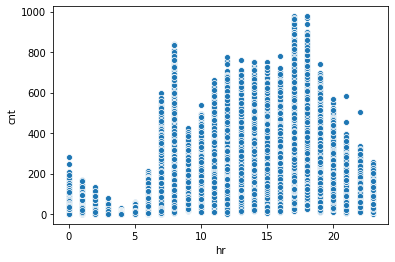

In [16]:
sns.scatterplot(x='hr', y='cnt', data=data_n)

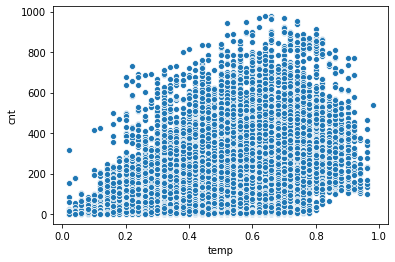

In [17]:
sns.scatterplot(x='temp', y='cnt', data=data_n)

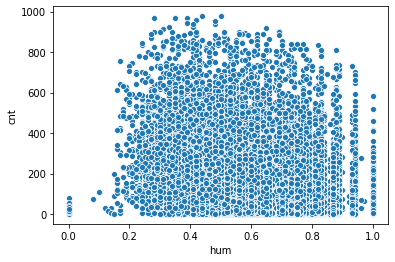

In [18]:
sns.scatterplot(x='hum', y='cnt', data=data_n)

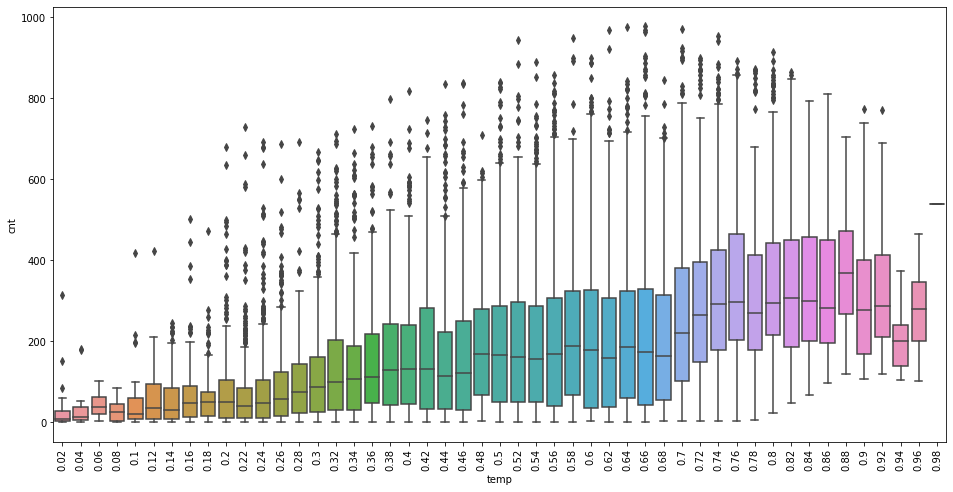

In [19]:
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='temp', y='cnt', data=data_n)
plt.xticks(rotation=90);

In [ ]:
#From the above plot, we can see that as the overall temperature increases, the mean of count also increases.

Text(0.5, 1.0, 'Countplot')

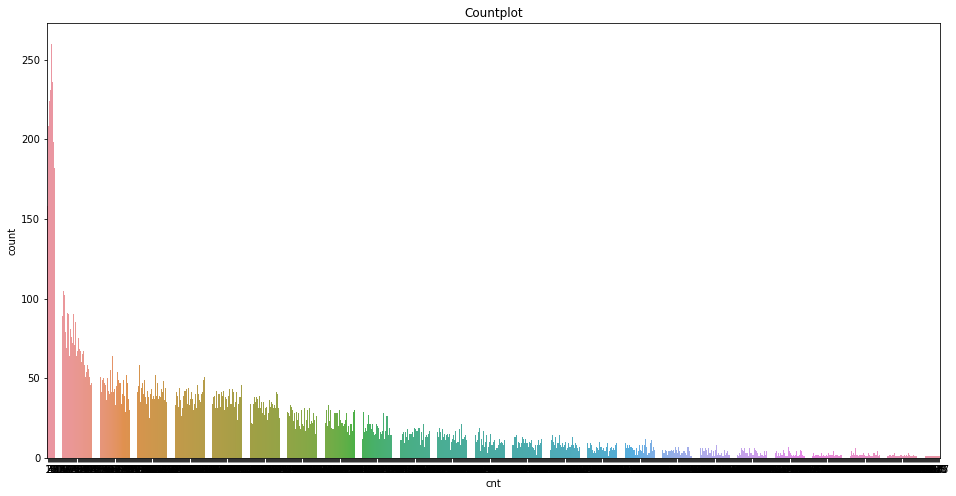

In [20]:
f, ax = plt.subplots(figsize=(16, 8))
sns.countplot(data_n['cnt'])
plt.title("Countplot")

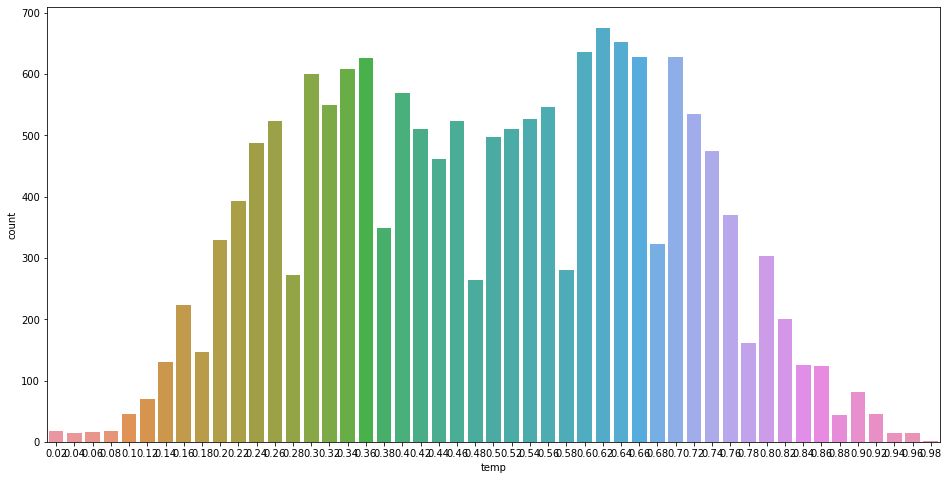

In [21]:
f, ax = plt.subplots(figsize=(16, 8))
sns.countplot(data_n['temp'])

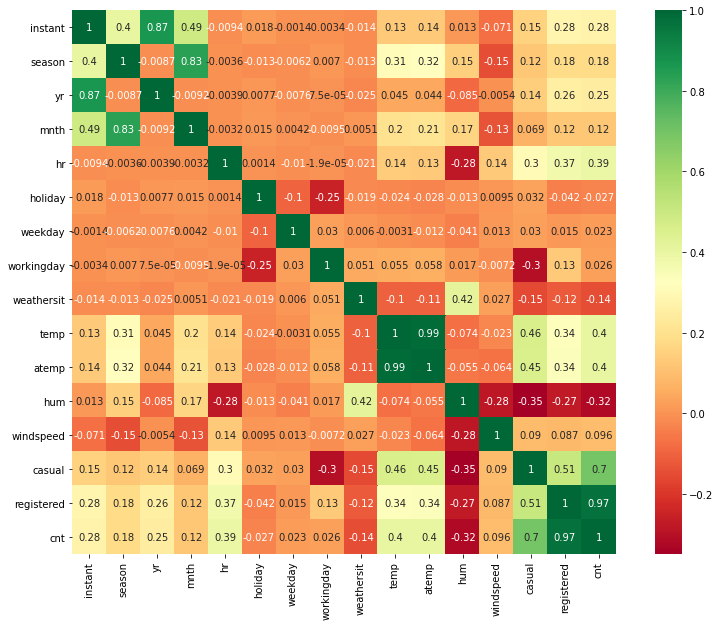

In [22]:
corrmat = data_n.corr()
plt.subplots(figsize=(14, 10))
sns.heatmap(corrmat, square=True, annot=True, cmap="RdYlGn");

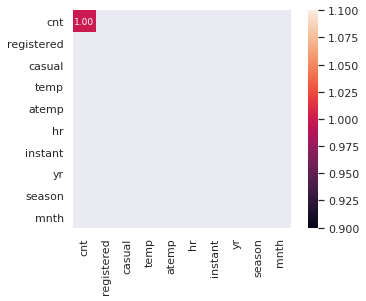

In [23]:
k = 10
cols = corrmat.nlargest(k, 'cnt')['cnt'].index
cm = np.corrcoef(data_n[cols].values.T)
sns.set(font_scale=1.00)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 9}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
#The above plot gives us the largest correlated variables out of all.

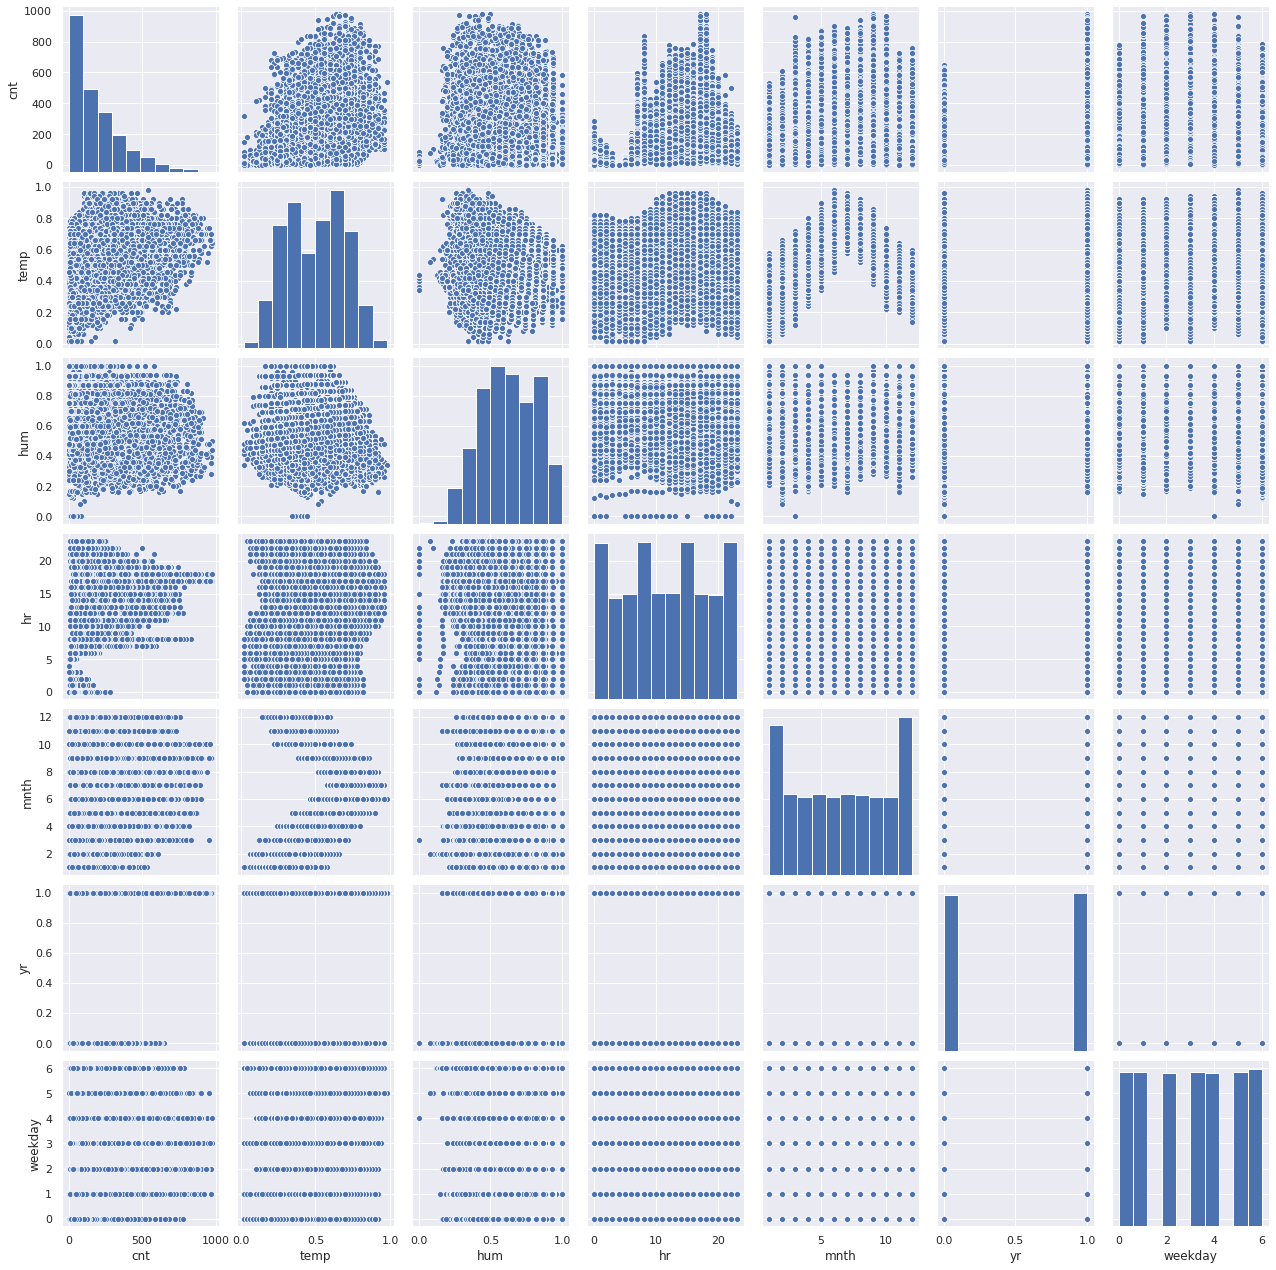

In [24]:
sns.set()
cols = ['cnt', 'temp', 'hum', 'hr', 'mnth', 'yr', 'weekday']
sns.pairplot(data_n[cols], size = 2.5)
plt.show();

In [25]:
miss = pd.DataFrame(data_n.isna().sum()[data_n.isna().sum() !=0].sort_values(ascending=False))
miss.columns = ['#Missing']
miss['Percent_Missing'] = data_n.isna().sum()/len(data_n) *100
miss

,#Missing,Percent_Missing
hum,1283,7.382473
weathersit,1281,7.370965
holiday,1268,7.296162
yr,1264,7.273146
registered,1248,7.181081
atemp,1245,7.163818
hr,1236,7.112032
temp,1229,7.071753
instant,1229,7.071753
windspeed,1228,7.065999


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

Text(0.5, 0, 'Features')

Text(0, 0.5, 'Percent of missing values')

Text(0.5, 1.0, 'Percent missing data by feature')

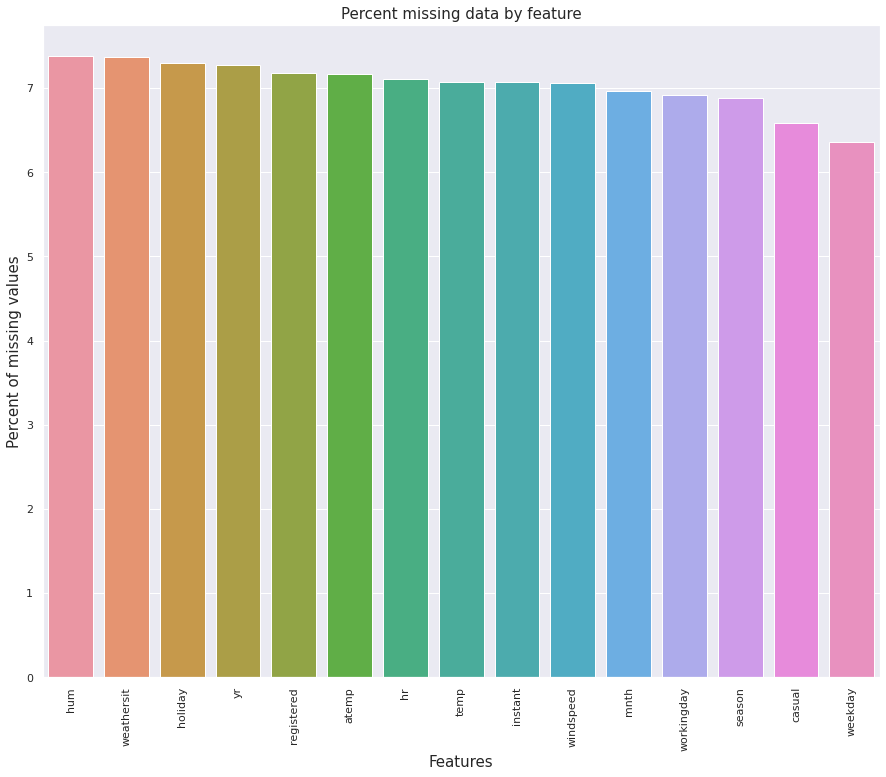

In [26]:
data_n_na = (data_n.isnull().sum() / len(data_n)) * 100
data_n_miss = data_n_na.drop(data_n_na[data_n_na == 0].index).sort_values(ascending=False)[:30]
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=data_n_miss.index, y=data_n_miss)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

## Data Imputation

In [27]:
for col in (
    'instant',
    'season',
    'yr',
    'mnth',
    'hr',
    'holiday',
    'weekday',
    'workingday',
    'weathersit',
    'temp',
    'atemp',
    'hum',
    'windspeed',
    'casual',
    'registered'):
    data_n[col].unique()

array([1.0000e+00,        nan, 3.0000e+00, ..., 1.7377e+04, 1.7378e+04,
       1.7379e+04])

array([ 1., nan,  2.,  3.,  4.])

array([ 0., nan,  1.])

array([ 1., nan,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       nan, 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 13.])

array([ 0., nan,  1.])

array([ 6.,  0., nan,  1.,  2.,  3.,  4.,  5.])

array([ 0., nan,  1.])

array([ 1.,  2.,  3., nan,  4.])

array([0.24,  nan, 0.22, 0.2 , 0.32, 0.38, 0.36, 0.42, 0.46, 0.44, 0.4 ,
       0.34, 0.3 , 0.26, 0.16, 0.14, 0.18, 0.12, 0.28, 0.1 , 0.08, 0.06,
       0.04, 0.02, 0.52, 0.56, 0.58, 0.6 , 0.48, 0.54, 0.5 , 0.66, 0.64,
       0.62, 0.68, 0.7 , 0.76, 0.74, 0.72, 0.78, 0.82, 0.8 , 0.86, 0.88,
       0.9 , 0.84, 0.92, 0.94, 0.96, 0.98])

array([0.2879, 0.2727, 0.2576, 0.3485, 0.3939,    nan, 0.4242, 0.4545,
       0.4394, 0.4091, 0.3333, 0.2273, 0.2121, 0.197 , 0.1667, 0.1364,
       0.1061, 0.1818, 0.2424, 0.1515, 0.3182, 0.1212, 0.0606, 0.0758,
       0.0909, 0.303 , 0.0303, 0.0455, 0.    , 0.0152, 0.3636, 0.5   ,
       0.5303, 0.5455, 0.5909, 0.4697, 0.5152, 0.6212, 0.6061, 0.4848,
       0.3788, 0.6364, 0.6515, 0.6667, 0.5758, 0.5606, 0.6818, 0.697 ,
       0.7424, 0.7727, 0.7576, 0.7273, 0.803 , 0.7879, 0.7121, 0.8333,
       0.8182, 0.8485, 0.8788, 0.8636, 0.8939, 0.9242, 0.9091, 0.9545,
       0.9848, 1.    ])

array([0.81, 0.8 , 0.75, 0.86, 0.76, 0.77,  nan, 0.72, 0.82, 0.88, 0.87,
       0.94, 1.  , 0.71, 0.66, 0.57, 0.46, 0.42, 0.39, 0.44, 0.47, 0.5 ,
       0.43, 0.4 , 0.35, 0.3 , 0.32, 0.64, 0.69, 0.55, 0.59, 0.63, 0.68,
       0.74, 0.51, 0.56, 0.52, 0.49, 0.48, 0.37, 0.33, 0.28, 0.38, 0.36,
       0.93, 0.29, 0.53, 0.34, 0.54, 0.41, 0.45, 0.92, 0.62, 0.58, 0.61,
       0.6 , 0.65, 0.7 , 0.27, 0.21, 0.25, 0.26, 0.31, 0.73, 0.24, 0.22,
       0.19, 0.15, 0.67, 0.1 , 0.08, 0.12, 0.14, 0.13, 0.17, 0.16, 0.18,
       0.96, 0.23, 0.2 , 0.85, 0.  , 0.9 , 0.83, 0.78, 0.84, 0.89, 0.79,
       0.97])

array([0.    , 0.0896, 0.2537,    nan, 0.2836, 0.2985, 0.194 , 0.2239,
       0.1343, 0.1642, 0.3284, 0.4478, 0.3582, 0.4179, 0.3881, 0.1045,
       0.4925, 0.5522, 0.4627, 0.5224, 0.5821, 0.6567, 0.6119, 0.7761,
       0.6866, 0.6418, 0.806 , 0.7463, 0.8507, 0.8358, 0.7164])

array([  3.,   8.,   5.,   0.,   2.,   1.,  12.,  26.,  29.,  47.,  35.,
        40.,  41.,  15.,  nan,   6.,  11.,   4.,   7.,  16.,  20.,  19.,
         9.,  10.,  13.,  14.,  18.,  17.,  21.,  33.,  23.,  22.,  24.,
        28.,  48.,  42.,  30.,  27.,  32.,  58.,  62.,  51.,  31.,  59.,
        45.,  73.,  55.,  68.,  52.,  34.,  38., 102.,  84.,  39.,  36.,
        72.,  76., 108.,  66.,  60.,  57.,  53.,  61.,  90., 105.,  98.,
        43.,  80.,  83.,  74.,  37.,  25.,  70.,  81., 100.,  99.,  54.,
        88.,  97., 144., 149., 124.,  67.,  95.,  46., 126., 174., 168.,
       170., 175., 138.,  92., 120., 145., 172.,  44.,  75.,  94.,  93.,
       110., 118.,  64.,  50.,  56., 111.,  89.,  69.,  71., 139., 166.,
       219., 240., 147., 148.,  78.,  63.,  79., 114.,  85., 121., 156.,
       135., 103.,  49.,  91., 119., 167., 181., 179., 161., 143., 182.,
       171., 180., 205., 197., 162., 142.,  96.,  65.,  77., 185., 184.,
       191., 134., 150., 109., 123., 113., 132., 12

array([ 13.,  32.,  27.,  10.,   1.,   0.,   2.,   7.,  nan,  24.,  30.,
        55.,  47.,  71.,  70.,  52.,  26.,  31.,  25.,  16.,   8.,   4.,
        19.,  46.,  54.,  73.,  64.,  67.,  58.,  43.,  29.,  17.,  20.,
         9.,   5.,   3.,  63., 153.,  81.,  33.,  41.,  48.,  53.,  66.,
       146., 148., 102.,  49.,  11.,  36.,  92., 177.,  98.,  50.,  79.,
        68., 202., 179., 110.,  34.,   6.,  87., 192., 109.,  74.,  65.,
        85., 186., 166., 127.,  82.,  40.,  18.,  95., 216., 116.,  42.,
        57.,  78.,  59., 163., 158.,  51.,  76., 190., 178.,  39.,  14.,
        15.,  56.,  60.,  90.,  83.,  69.,  28.,  22.,  12.,  77.,  44.,
        38.,  75., 184., 174., 154.,  37.,  97., 214.,  45.,  72., 130.,
        94., 125., 139., 135., 197., 137., 141., 156., 117., 155., 134.,
        89.,  80., 108.,  35.,  61., 124., 132., 196., 107., 100., 247.,
       140.,  86.,  62., 207., 210., 159., 151., 119.,  93.,  23., 145.,
       101.,  21., 103., 233., 208., 218., 133.,  8

In [ ]:
#All of the above features have missing values, i.e those features are not there. So, we can impute the missing values with None.

In [0]:
for col in (
    'instant',
    'season',
    'yr',
    'mnth',
    'hr',
    'holiday',
    'weekday',
    'workingday',
    'weathersit',
    'temp',
    'atemp',
    'hum',
    'windspeed',
    'casual',
    'registered'):
    data_n[col] = data_n[col].fillna('None')

In [0]:
data_n = data_n.drop('instant', axis=1)

In [30]:
data_n

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,3,13,16
1,1,0,1,1,0,6,0,1,None,0.2727,0.8,0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.8,0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.6,0.1642,11,108,119
17375,1,1,12,20,0,1,None,2,0.26,0.2576,0.6,0.1642,8,81,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.6,0.1642,7,83,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [0]:
# fill na of hum, windspeed, casual, registered to 0
data_n['windspeed'].replace('None', 0, inplace=True)
data_n['hum'].replace('None', 0, inplace=True)
data_n['casual'].replace('None', 0, inplace=True)
data_n['registered'].replace('None', 0, inplace=True)
data_n['temp'].replace('None', 0, inplace=True)
data_n['atemp'].replace('None', 0, inplace=True)

In [0]:
# drop rows that have na for season, yr, mnth, hr, holiday, weekday, workingday, weathersit
data_n = data_n.mask(data_n.eq('None')).dropna()

In [33]:
data_n


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3.0,13.0,16
1,1,0,1,1,0,6,0,1,0.00,0.2727,0.80,0.0000,8.0,32.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5.0,27.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3.0,10.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17371,1,1,12,16,0,1,1,2,0.00,0.2576,0.48,0.1940,30.0,184.0,214
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11.0,108.0,119
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7.0,83.0,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13.0,48.0,61


In [34]:
miss = pd.DataFrame(data_n.isna().sum()[data_n.isna().sum() !=0].sort_values(ascending=False))
miss.columns = ['#Missing']
miss['Percent_Missing'] = data_n.isna().sum()/len(data_n) *100
miss

,#Missing,Percent_Missing
season,NaN,0.0
yr,NaN,0.0
mnth,NaN,0.0
hr,NaN,0.0
holiday,NaN,0.0
weekday,NaN,0.0
workingday,NaN,0.0
weathersit,NaN,0.0
temp,NaN,0.0
atemp,NaN,0.0


## Data Preprocessing

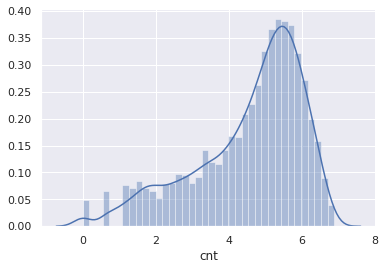

In [35]:
data_n['cnt'] = np.log(data_n['cnt'])
sns.distplot(data_n['cnt'])

## Model Estimation



In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
data_sample = data_n.sample(n=1000, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(data_sample.drop('cnt', axis=1), data_sample['cnt'], random_state=0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
y_train

15052    5.793014
3833     5.220356
7853     5.049856
4514     3.091042
8237     5.036953
           ...   
6976     3.044522
1722     4.356709
869      4.418841
737      0.693147
16801    5.484797
Name: cnt, Length: 750, dtype: float64

## Bagging

## KNN Regressor

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                    weights='uniform')

Text(0.5, 0, 'k')

Text(0, 0.5, 'MSE')

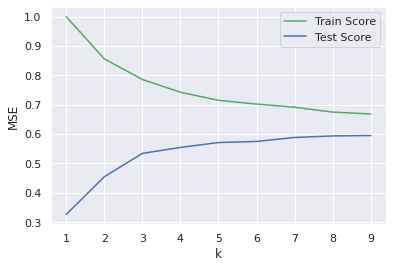

In [38]:
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline
train_scorearray = []
test_scorearray = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_scorearray.append(knn_reg.score(X_train, y_train))
    test_scorearray.append(knn_reg.score(X_test, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_scorearray, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_scorearray, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

In [39]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

from sklearn.model_selection import GridSearchCV

k_range = [2,3,5,7,9,10]          

param_grid = dict(n_neighbors=k_range)


#grid_search = GridSearchCV(knn, param_grid, cv=10, return_train_score=True)
grid_search = GridSearchCV(knn, param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 5, 7, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

Best parameters: {'n_neighbors': 9}
Best cross-validation score: 0.58


## Bagging for KNN Regressor along with the Grid Search CV

In [40]:
from sklearn.ensemble import BaggingRegressor

knn_r = KNeighborsRegressor(n_neighbors=9)  #taking the best parameters from the grid search applied in the Project 1

n_estimators_vals = [100,200, 300]
max_samples_vals = [ 50,100,150, 200]


param_grid = dict(n_estimators=n_estimators_vals, max_samples = max_samples_vals)

bag_rg = BaggingRegressor(knn_r,bootstrap = True, random_state=0)

grid_search = GridSearchCV(bag_rg, param_grid = param_grid, cv=10, return_train_score=True)

grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


GridSearchCV(cv=100, error_score=nan,
             estimator=BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                                           leaf_size=30,
                                                                           metric='minkowski',
                                                                           metric_params=None,
                                                                           n_jobs=None,
                                                                           n_neighbors=9,
                                                                           p=2,
                                                                           weights='uniform'),
                                        bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        

Best parameters: {'max_samples': 200, 'n_estimators': 300}
Best cross-validation score: 0.40


In [41]:
bag_rg_best = BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=9) , n_estimators = 100 , max_samples = 200,
                               bootstrap = True, random_state=0)
bag_rg_best.fit(X_train, y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                    leaf_size=30,
                                                    metric='minkowski',
                                                    metric_params=None,
                                                    n_jobs=None, n_neighbors=9,
                                                    p=2, weights='uniform'),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=200, n_estimators=100, n_jobs=None,
                 oob_score=False, random_state=0, verbose=0, warm_start=False)

In [42]:
print("The Train score = ", bag_rg_best.score(X_train, y_train))
print("The Test score = ", bag_rg_best.score(X_test, y_test))

Train score :  0.5722650400369571
Test score:  0.5159493208449815


In [43]:
from sklearn import metrics
bag_tr_pred = bag_rg_best.predict(X_train)
bag_test_pred = bag_rg_best.predict(X_test)
bag_tr_mse = metrics.mean_squared_error(y_train, bag_tr_pred)
bag_tr_rmse = np.sqrt(bag_tr_mse)
bag_test_mse = metrics.mean_squared_error(y_test, bag_test_pred)
bag_test_rmse = np.sqrt(bag_test_mse)

print('The train mse = ', bag_tr_mse)
print('The train rmse = ', bag_tr_rmse)

print('The test mse = ', bag_test_mse)
print('The test rmse =', bag_test_rmse)

print('The train score = ', bag_rg_best.score(X_train, y_train))
print('The test score = ', bag_rg_best.score(X_test, y_test) )


train mse:  0.863609196869231
train rmse:  0.9293057606994756
test mse:  1.196893264332175
test rmse:  1.0940261716852002
train score:  0.5722650400369571
test score:  0.5159493208449815


## Ridge

In [44]:
from  sklearn.linear_model import Ridge

x_range = [0.0000000000000001,0.01, 0.1, 1, 10, 100]
train_scorelist = []
test_scorelist = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_scorelist.append(ridge.score(X_train,y_train))
    test_scorelist.append(ridge.score(X_test, y_test))
    
print(train_scorelist)
print(test_scorelist)

Ridge(alpha=1e-16, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

[0.6876732351528976, 0.6876731945637522, 0.6876692103924356, 0.6873022753492131, 0.6677679373295544, 0.4590531698063108]
[0.6627370496574573, 0.6627065899028979, 0.662431075102853, 0.6595547730111884, 0.626585270180978, 0.41730394530859877]


Text(0.5, 0, '$\\alpha$')

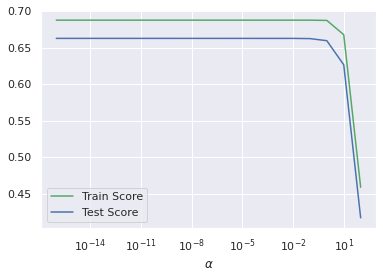

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [46]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np

bestScore=0
for alpha in [0.001,0.01, 0.1, 1, 10, 100]:
    
        ridge =Ridge()
        scores = cross_val_score(ridge, X_train, y_train, cv=5)
        score = np.mean(scores)
        if score > bestScore:
            bestScore = score
            bestParameters = {'alpha': alpha}
            

ridge = Ridge(**bestParameters)
ridge.fit(X_train, y_train)
test_score = ridge.score(X_test, y_test)
print("Best score on train set = {:.2f}".format(bestScore))
print("Best parameters= ", bestParameters)
print("Test set score with best parameters= {:.2f}".format(test_score))

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Best score on train set: 0.67
Best parameters:  {'alpha': 0.001}
Test set score with best parameters: 0.66


In [47]:
ridge = Ridge(alpha = 0.001)
ridge.fit(X_train,y_train)
print('Train score= {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score= {:.4f}'.format(ridge.score(X_test, y_test)))

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Train score: 0.6877
Test score: 0.6627


In [48]:
from sklearn import  metrics
ridge_tr_pred = ridge.predict(X_train)
ridge_test_pred =ridge.predict(X_test)
ridge_tr_mse = metrics.mean_squared_error(y_train,ridge_tr_pred)
ridge_tr_rmse = np.sqrt(ridge_tr_mse)
ridge_test_mse = metrics.mean_squared_error(y_test, ridge_test_pred)
ridge_test_rmse = np.sqrt(ridge_test_mse)

print('train mse: ', ridge_tr_mse)
print('train rmse: ', ridge_tr_rmse)

print('test mse: ', ridge_test_mse)
print('test rmse: ', ridge_test_rmse)

train mse:  0.6305967296302022
train rmse:  0.794101208681993
test mse:  0.8339444917587214
test rmse:  0.9132056130788517


## Applying Bagging for Ridge along with the GridSearchCV

In [0]:
from sklearn.ensemble import BaggingRegressor


ridge = Ridge(alpha = 0.001)

#base_estimators = [Ridge(alpha = 0.001), Ridge(alpha = 0.01), Ridge(alpha = 0.1), Ridge(alpha = 1), Ridge(alpha = 10)]

n_estimators_vals = [100, 200, 300, 400, 500]
max_samples_vals = [ 20,30,50,70,100,150, 170, 200]


param_grid = dict(n_estimators=n_estimators_vals, max_samples = max_samples_vals)

bag_rg_ridge = BaggingRegressor(ridge, bootstrap = True, random_state=0)

grid_search = GridSearchCV(bag_rg_ridge, param_grid = param_grid, cv=10, return_train_score=True)


In [50]:
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


GridSearchCV(cv=10, error_score=nan,
             estimator=BaggingRegressor(base_estimator=Ridge(alpha=0.001,
                                                             copy_X=True,
                                                             fit_intercept=True,
                                                             max_iter=None,
                                                             normalize=False,
                                                             random_state=None,
                                                             solver='auto',
                                                             tol=0.001),
                                        bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=0,
           

Best parameters: {'max_samples': 170, 'n_estimators': 500}
Best cross-validation score: 0.67


In [51]:
bag_ridge_best = BaggingRegressor(Ridge(alpha=0.001), n_estimators = 500 , max_samples = 70,
                                  bootstrap = True, random_state=0)
bag_ridge_best.fit(X_train, y_train)
print("Train score : ", bag_ridge_best.score(X_train, y_train))
print("Test score: ", bag_ridge_best.score(X_test, y_test))

BaggingRegressor(base_estimator=Ridge(alpha=0.001, copy_X=True,
                                      fit_intercept=True, max_iter=None,
                                      normalize=False, random_state=None,
                                      solver='auto', tol=0.001),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=70, n_estimators=500, n_jobs=None, oob_score=False,
                 random_state=0, verbose=0, warm_start=False)

Train score :  0.6872134958164811
Test score:  0.6621734156906558


In [52]:
from sklearn import metrics
bag_ridge_tr_pred = bag_ridge_best.predict(X_train)
bag_ridge_test_pred = bag_ridge_best.predict(X_test)
bag_ridge_tr_mse = metrics.mean_squared_error(y_train, bag_ridge_tr_pred)
bag_ridge_tr_rmse = np.sqrt(bag_ridge_tr_mse)
bag_ridge_test_mse = metrics.mean_squared_error(y_test, bag_ridge_test_pred)
bag_ridge_test_rmse = np.sqrt(bag_ridge_test_mse)

print('train mse: ', bag_ridge_tr_mse)
print('train rmse: ', bag_ridge_tr_rmse)

print('test mse: ', bag_ridge_test_mse)
print('test rmse: ', bag_ridge_test_rmse)

print('train score: ', bag_ridge_best.score(X_train, y_train))
print('test score: ', bag_ridge_best.score(X_test, y_test) )


train mse:  0.6315249557642015
train rmse:  0.794685444540292
test mse:  0.8353306393000806
test rmse:  0.9139642439943045
train score:  0.6872134958164811
test score:  0.6621734156906558


## Pasting

## Lasso

In [53]:
from sklearn.linear_model import Lasso
x_range = [0.001,0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))
    
print(train_score_list)
print(test_score_list)
    

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

[0.687552892997156, 0.6829336924930267, 0.47062651897670416, 0.0, 0.0, 0.0]
[0.6624724016457642, 0.6565710462755624, 0.4204352508313733, -0.0005452691116913932, -0.0005452691116913932, -0.0005452691116913932]


Text(0.5, 0, '$\\alpha$')

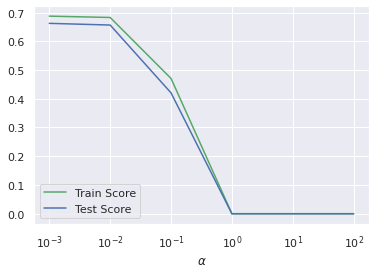

In [54]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [55]:
from sklearn.linear_model import Lasso
import numpy as np

for alpha in [0.001, 0.01, 0.1, 1, 10, 100]:
    
        lasso =Lasso()
        # perform cross-validation
        scores = cross_val_score(ridge, X_train, y_train, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'alpha': alpha}
            
# rebuild a model on the combined training and validation set
lasso = Lasso(**best_parameters)
lasso.fit(X_train, y_train)
test_score = lasso.score(X_test, y_test)
print("Best score on train set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Best score on train set: 0.67
Best parameters:  {'alpha': 0.001}
Test set score with best parameters: 0.66


In [56]:
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train,y_train)
print('Train score: {:.4f}'.format(lasso.score(X_train,y_train)))
print('Test score: {:.4f}'.format(lasso.score(X_test, y_test)))

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Train score: 0.6876
Test score: 0.6625


In [57]:
from sklearn import  metrics
lasso_tr_pred = lasso.predict(X_train)
lasso_test_pred =lasso.predict(X_test)
lasso_tr_mse = metrics.mean_squared_error(y_train,lasso_tr_pred)
lasso_tr_rmse = np.sqrt(lasso_tr_mse)
lasso_test_mse = metrics.mean_squared_error(y_test, lasso_test_pred)
lasso_test_rmse = np.sqrt(lasso_test_mse)

print('train mse: ', lasso_tr_mse)
print('train rmse: ', lasso_tr_rmse)

print('test mse: ', lasso_test_mse)
print('test rmse: ', lasso_test_rmse)

train mse:  0.6308397030865908
train rmse:  0.7942541804023386
test mse:  0.8345913483720646
test rmse:  0.9135597125377545


## Applying Pasting for Lasso along with GridSearchCV

In [0]:
lasso = Lasso(alpha = 0.001)


#base_estimators = [Lasso(alpha = 0.001), Lasso(alpha = 0.01), Lasso(alpha = 0.1), Lasso(alpha = 1), Lasso(alpha = 10)]

n_estimators_vals = [100, 200, 300, 400, 500]
max_samples_vals = [ 20,30,50,70,100,150, 170, 200]


param_grid = dict(n_estimators=n_estimators_vals, max_samples = max_samples_vals)


bag_rg_lasso = BaggingRegressor(lasso,bootstrap = False, random_state=0)

grid_search = GridSearchCV(bag_rg_lasso, param_grid = param_grid, cv=10, return_train_score=True)

In [59]:
grid_search.fit(X_train, y_train)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

GridSearchCV(cv=10, error_score=nan,
             estimator=BaggingRegressor(base_estimator=Lasso(alpha=0.001,
                                                             copy_X=True,
                                                             fit_intercept=True,
                                                             max_iter=1000,
                                                             normalize=False,
                                                             positive=False,
                                                             precompute=False,
                                                             random_state=None,
                                                             selection='cyclic',
                                                             tol=0.0001,
                                                             warm_start=False),
                                        bootstrap=False,
                                        bootstrap_fea

Best score on validation set: 0.67
Best parameters: {'max_samples': 150, 'n_estimators': 100}
Best cross-validation score: 0.67


In [60]:
bag_lasso_best = BaggingRegressor(Lasso(alpha = 0.001), n_estimators = 200 , max_samples = 30,
                                  bootstrap = False, random_state=0)
bag_lasso_best.fit(X_train, y_train)
print("Train score : ", bag_lasso_best.score(X_train, y_train))
print("Test score: ", bag_lasso_best.score(X_test, y_test))

BaggingRegressor(base_estimator=Lasso(alpha=0.001, copy_X=True,
                                      fit_intercept=True, max_iter=1000,
                                      normalize=False, positive=False,
                                      precompute=False, random_state=None,
                                      selection='cyclic', tol=0.0001,
                                      warm_start=False),
                 bootstrap=False, bootstrap_features=False, max_features=1.0,
                 max_samples=30, n_estimators=200, n_jobs=None, oob_score=False,
                 random_state=0, verbose=0, warm_start=False)

Train score :  0.6846360851861613
Test score:  0.6600627535238207


In [61]:
from sklearn import metrics
bag_lasso_tr_pred = bag_lasso_best.predict(X_train)
bag_lasso_test_pred = bag_lasso_best.predict(X_test)
bag_lasso_tr_mse = metrics.mean_squared_error(y_train, bag_lasso_tr_pred)
bag_lasso_tr_rmse = np.sqrt(bag_lasso_tr_mse)
bag_lasso_test_mse = metrics.mean_squared_error(y_test, bag_lasso_test_pred)
bag_lasso_test_rmse = np.sqrt(bag_lasso_test_mse)

print('train mse: ', bag_lasso_tr_mse)
print('train rmse: ', bag_lasso_tr_rmse)

print('test mse: ', bag_lasso_test_mse)
print('test rmse: ', bag_lasso_test_rmse)

print('train score: ', bag_lasso_best.score(X_train, y_train))
print('test score: ', bag_lasso_best.score(X_test, y_test) )

train mse:  0.6367288220197096
train rmse:  0.7979528946120251
test mse:  0.8405495914461153
test rmse:  0.9168149166795418
train score:  0.6846360851861613
test score:  0.6600627535238207


## SVM with Linear Kernel

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVR


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
 
svm_r = svm.SVR()
grid_search = GridSearchCV(svm_r, param_grid, cv=5, return_train_score=True,)
    

grid_search = GridSearchCV(svm_r, param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

Best parameters: {'C': 10}
Best cross-validation score: 0.76


In [63]:
# SVM Linear
from sklearn import metrics

from sklearn import svm
svm_r = svm.SVR(kernel='linear', C = 100)
svm_r.fit(X_train, y_train)

svmr_tr_pred = svm_r.predict(X_train)
svmr_test_pred = svm_r.predict(X_test)

print("train score:", svm_r.score(X_train,y_train))
print("test score:", svm_r.score(X_test,y_test))
    
svm_tr_mse = metrics.mean_squared_error(y_train, svmr_tr_pred)
svm_tr_rmse = np.sqrt(svm_tr_mse)
svm_test_mse = metrics.mean_squared_error(y_test, svmr_test_pred)
svm_test_rmse = np.sqrt(svm_test_mse)

print('train mse: ', svm_tr_mse)
print('train rmse: ', svm_tr_rmse)

print('test mse: ', svm_test_mse)
print('test rmse: ', svm_test_rmse)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

train score: 0.6621695406084835
test score: 0.6045156346897523
train mse:  0.6820894222400689
train rmse:  0.8258870517450124
test mse:  0.9778987890582596
test rmse:  0.9888876523944767


## Applying Pasting for SVM Linear

In [0]:
from sklearn.ensemble import BaggingRegressor

svm_r = svm.SVR(kernel='linear', C = 0.1)


n_estimators_vals = [100, 200, 300]
max_samples_vals = [ 100, 200, 300]


param_grid = dict(n_estimators=n_estimators_vals, max_samples = max_samples_vals)

bag_rg_svm = BaggingRegressor(svm_r,bootstrap = False, random_state=0)

grid_search = GridSearchCV(bag_rg_svm, param_grid = param_grid, cv= 10, return_train_score=True)

In [65]:
grid_search.fit(X_train, y_train)
#print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

GridSearchCV(cv=10, error_score=nan,
             estimator=BaggingRegressor(base_estimator=SVR(C=0.1,
                                                           cache_size=200,
                                                           coef0=0.0, degree=3,
                                                           epsilon=0.1,
                                                           gamma='scale',
                                                           kernel='linear',
                                                           max_iter=-1,
                                                           shrinking=True,
                                                           tol=0.001,
                                                           verbose=False),
                                        bootstrap=False,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                              

Best parameters: {'max_samples': 300, 'n_estimators': 300}
Best cross-validation score: 0.57


In [66]:
bag_svm_best = BaggingRegressor(base_estimator= svm.SVR(kernel='linear', C = 0.1), n_estimators = 300 , max_samples = 300, 
                                bootstrap = False, random_state=0)
bag_svm_best.fit(X_train, y_train)
print("Train score : ", bag_svm_best.score(X_train, y_train))
print("Test score: ", bag_svm_best.score(X_test, y_test))

BaggingRegressor(base_estimator=SVR(C=0.1, cache_size=200, coef0=0.0, degree=3,
                                    epsilon=0.1, gamma='scale', kernel='linear',
                                    max_iter=-1, shrinking=True, tol=0.001,
                                    verbose=False),
                 bootstrap=False, bootstrap_features=False, max_features=1.0,
                 max_samples=300, n_estimators=300, n_jobs=None,
                 oob_score=False, random_state=0, verbose=0, warm_start=False)

Train score :  0.582534961181467
Test score:  0.5186446891311476


In [67]:
from sklearn import metrics
bag_svm_tr_pred = bag_svm_best.predict(X_train)
bag_svm_test_pred = bag_svm_best.predict(X_test)
bag_svm_tr_mse = metrics.mean_squared_error(y_train, bag_svm_tr_pred)
bag_svm_tr_rmse = np.sqrt(bag_svm_tr_mse)
bag_svm_test_mse = metrics.mean_squared_error(y_test, bag_svm_test_pred)
bag_svm_test_rmse = np.sqrt(bag_svm_test_mse)

print('train mse: ', bag_svm_tr_mse)
print('train rmse: ', bag_svm_tr_rmse)

print('test mse: ', bag_svm_test_mse)
print('test rmse: ', bag_svm_test_rmse)

print('train score: ', bag_svm_best.score(X_train, y_train))
print('test score: ', bag_svm_best.score(X_test, y_test) )

train mse:  0.8428739304503093
train rmse:  0.9180816578335008
test mse:  1.1902285321346326
test rmse:  1.0909759539671957
train score:  0.582534961181467
test score:  0.5186446891311476


## Adaboost boosting

## SVM with Radial Kernel

In [68]:
#### Grid search for kernel = rbf

from sklearn.model_selection import GridSearchCV
#param_grid = dict(k_range' : [1,3,5,7,9,12,15,17,20])

from sklearn import svm
from sklearn.svm import SVR
import numpy as np

param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100],'C': [0.001, 0.01, 0.1, 1, 10, 100]}
 
svm_rbf = svm.SVR(kernel='rbf')
grid_search = GridSearchCV(svm_rbf,param_grid = param_grid , cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

Best parameters: {'C': 100, 'gamma': 0.1}
Best cross-validation score: 0.78


In [69]:
svm_rbf_best = svm.SVR(kernel='rbf', C = 100, gamma = 0.1)
svm_rbf_best.fit(X_train, y_train)

svmr_tr_pred = svm_rbf_best.predict(X_train)
svmr_test_pred = svm_rbf_best.predict(X_test)

svm_rbf_tr_mse = metrics.mean_squared_error(y_train, svmr_tr_pred)
svm_rbf_tr_rmse = np.sqrt(svm_tr_mse)
svm_rbf_test_mse = metrics.mean_squared_error(y_test, svmr_test_pred)
svm_rbf_test_rmse = np.sqrt(svm_test_mse)

print("train score:", svm_rbf_best.score(X_train,y_train))
print("test score:",svm_rbf_best.score(X_test,y_test))

print('train mse: ', svm_rbf_tr_mse)
print('train rmse: ', svm_rbf_tr_rmse) 

print('test mse: ', svm_rbf_test_mse)
print('test rmse: ', svm_rbf_test_rmse)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

train score: 0.8349768106185435
test score: 0.7535633518752912
train mse:  0.33318656968986665
train rmse:  0.8258870517450124
test mse:  0.6093543030245416
test rmse:  0.9888876523944767


## Applying Adaboost with GridSearchCV

In [0]:
from sklearn.ensemble import AdaBoostRegressor

svm_rbf = svm.SVR(kernel='rbf', C = 0.1, gamma=0.1)

n_estimators_vals = [100, 200, 300]
learning_rate_vals = [0.1, 1, 10]

param_grid = dict(n_estimators=n_estimators_vals, learning_rate = learning_rate_vals )

ada_svm_rbf = AdaBoostRegressor(svm_rbf,random_state=0)

grid_search = GridSearchCV(ada_svm_rbf, param_grid = param_grid, cv=5, return_train_score=True)

In [71]:
grid_search.fit(X_train, y_train)
#print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=SVR(C=0.1,
                                                            cache_size=200,
                                                            coef0=0.0, degree=3,
                                                            epsilon=0.1,
                                                            gamma=0.1,
                                                            kernel='rbf',
                                                            max_iter=-1,
                                                            shrinking=True,
                                                            tol=0.001,
                                                            verbose=False),
                                         learning_rate=1.0, loss='linear',
                                         n_estimators=50, random_state=0),
             iid='deprecated', n_jobs=None,
             param_grid={'learni

Best parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Best cross-validation score: 0.50


In [72]:
ada_svm_best = AdaBoostRegressor(base_estimator=svm.SVR(kernel='rbf', C = 0.1, gamma=0.1), n_estimators = 100 , learning_rate = 0.1 , random_state=0)
ada_svm_best.fit(X_train, y_train)
print("Train score : ", ada_svm_best.score(X_train, y_train))
print("Test score: ", ada_svm_best.score(X_test, y_test))

AdaBoostRegressor(base_estimator=SVR(C=0.1, cache_size=200, coef0=0.0, degree=3,
                                     epsilon=0.1, gamma=0.1, kernel='rbf',
                                     max_iter=-1, shrinking=True, tol=0.001,
                                     verbose=False),
                  learning_rate=0.1, loss='linear', n_estimators=100,
                  random_state=0)

Train score :  0.5616665245218853
Test score:  0.5120166926436069


In [73]:
from sklearn import metrics
ada_svm_tr_pred = ada_svm_best.predict(X_train)
ada_svm_test_pred = ada_svm_best.predict(X_test)
ada_svm_tr_mse = metrics.mean_squared_error(y_train, ada_svm_tr_pred)
ada_svm_tr_rmse = np.sqrt(ada_svm_tr_mse)
ada_svm_test_mse = metrics.mean_squared_error(y_test, ada_svm_test_pred)
ada_svm_test_rmse = np.sqrt(ada_svm_test_mse)

print('train mse: ', ada_svm_tr_mse)
print('train rmse: ', ada_svm_tr_rmse)

print('test mse: ', ada_svm_test_mse)
print('test rmse: ', ada_svm_test_rmse)

print('train score: ', ada_svm_best.score(X_train, y_train))
print('test score: ', ada_svm_best.score(X_test, y_test) )

train mse:  0.8850079047811775
train rmse:  0.940748587445752
test mse:  1.2066173209403892
test rmse:  1.0984613424879317
train score:  0.5616665245218853
test score:  0.5120166926436069


## Decision Tree - Applying Adaboost for Decision Tree

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import os
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

max_depth_val = [2,3,4,5,6,7,8,9,10]
max_features_val = [3,5,7,9,10,11,13,15,17,19,20,23,25,28]

param_grid = dict(max_depth=max_depth_val, max_features = max_features_val)

dt_reg = DecisionTreeRegressor(random_state=0)


grid_search = GridSearchCV(dt_reg, param_grid = dict(max_depth=max_depth_val, max_features = max_features_val), 
                           cv=5, return_train_score=True)


In [75]:
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [3, 5, 7, 9, 10, 11, 13, 15, 17, 19,
                                          20, 23, 25, 28]

Best parameters: {'max_depth': 8, 'max_features': 11}
Best cross-validation score: 0.92


In [76]:
dt_r = DecisionTreeRegressor(max_depth = 6, max_features=11, random_state=0)
dt_r.fit(X_train,y_train)

dt_tr_pred = dt_r.predict(X_train)
dt_test_pred = dt_r.predict(X_test)
lreg = LinearRegression().fit(X_train, y_train)

pred_lr = lreg.predict(X_train)
pred_test =lreg.predict(X_test)


print('Train Score:',dt_r.score(X_train,y_train))      
print('Test Score:',dt_r.score(X_test, y_test))

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=11, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

Train Score: 0.9788936703635557
Test Score: 0.9300719382453458


In [0]:
from sklearn.ensemble import AdaBoostRegressor

dt_r = DecisionTreeRegressor(max_depth = 6, max_features=11, random_state=0)

n_estimators_vals = [100, 200, 300, 400]
learning_rate_vals = [0.01, 0.1, 1, 10, 100]

param_grid = dict(n_estimators=n_estimators_vals, learning_rate = learning_rate_vals )

ada_dt = AdaBoostRegressor(dt_r,random_state=0)

grid_search = GridSearchCV(ada_dt, param_grid = param_grid, cv=5, return_train_score=True)

In [78]:
grid_search.fit(X_train, y_train)
#print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                              criterion='mse',
                                                                              max_depth=6,
                                                                              max_features=11,
                                                                              max_leaf_nodes=None,
                                                                              min_impurity_decrease=0.0,
                                                                              min_impurity_split=None,
                                                                              min_samples_leaf=1,
                                                                              min_samples_split=2,
                                                                              min_weig

Best parameters: {'learning_rate': 1, 'n_estimators': 200}
Best cross-validation score: 0.96


In [79]:
ada_dt_best = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 6,max_features=11, random_state=0), 
                                n_estimators = 400 , learning_rate =1 , random_state=0)
ada_dt_best.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=6,
                                                       max_features=11,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=0,
                                                       splitter='best'),
                  learn

In [80]:
print("Train score : ", ada_dt_best.score(X_train, y_train))
print("Test score: ", ada_dt_best.score(X_test, y_test))

Train score :  0.9961966069120692
Test score:  0.9594810235354198


In [81]:
from sklearn import metrics
ada_dt_tr_pred = ada_dt_best.predict(X_train)
ada_dt_test_pred = ada_dt_best.predict(X_test)
ada_dt_tr_mse = metrics.mean_squared_error(y_train, ada_dt_tr_pred)
ada_dt_tr_rmse = np.sqrt(ada_dt_tr_mse)
ada_dt_test_mse = metrics.mean_squared_error(y_test, ada_dt_test_pred)
ada_dt_test_rmse = np.sqrt(ada_dt_test_mse)

print('train mse: ', ada_dt_tr_mse)
print('train rmse: ', ada_dt_tr_rmse)

print('test mse: ', ada_dt_test_mse)
print('test rmse: ', ada_dt_test_rmse)

print('train score: ', ada_dt_best.score(X_train, y_train))
print('test score: ', ada_dt_best.score(X_test, y_test) )

train mse:  0.007679160128341205
train rmse:  0.08763081722967785
test mse:  0.1001896952045365
test rmse:  0.31652755836504426
train score:  0.9961966069120692
test score:  0.9594810235354198


## Gradient Boosting

## Decision Tree

In [82]:
!pip install mglearn

In [83]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import os
import pandas as pd
import mglearn


dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train,y_train)

dt_tr_pred = dt_reg.predict(X_train)
dt_test_pred = dt_reg.predict(X_test)
lreg = LinearRegression().fit(X_train, y_train)

pred_lr = lreg.predict(X_train)
pred_test =lreg.predict(X_test)


print('Train Score:',dt_reg.score(X_train,y_train))      
print('Train Score:',dt_reg.score(X_test, y_test))

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Train Score: 1.0
Train Score: 0.9431635175472527


In [0]:
from  sklearn.ensemble import GradientBoostingRegressor

dt_reg = DecisionTreeRegressor(max_depth = 6)

n_estimators_vals = [1,2,3,4,5,10,20,30,50,70,100,150,170,200]
learning_rate_vals = [0.01, 0.5, 0.1, 1]


param_grid = dict(n_estimators=n_estimators_vals, learning_rate = learning_rate_vals )

gbrt = GradientBoostingRegressor(random_state=0)
grid_search = GridSearchCV(gbrt, param_grid = param_grid,cv=10, return_train_score=True)

In [85]:
grid_search.fit(X_train, y_train)
#print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                

Best parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Best cross-validation score: 0.96


In [86]:
from  sklearn.ensemble import GradientBoostingRegressor

gbrt_dt = GradientBoostingRegressor(max_depth=6, n_estimators=200, learning_rate=0.1)
gbrt_dt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [87]:
print("Train score : ", gbrt_dt.score(X_train, y_train))
print("Test score: ", gbrt_dt.score(X_test, y_test))

Train score :  0.9999974482492167
Test score:  0.9629336056124949


In [88]:
from sklearn import metrics
grbt_dt_tr_pred = gbrt_dt.predict(X_train)
grbt_dt_test_pred = gbrt_dt.predict(X_test)
grbt_dt_tr_mse = metrics.mean_squared_error(y_train, grbt_dt_tr_pred)
grbt_dt_tr_rmse = np.sqrt(grbt_dt_tr_mse)
grbt_dt_test_mse = metrics.mean_squared_error(y_test, grbt_dt_test_pred)
grbt_dt_test_rmse = np.sqrt(grbt_dt_test_mse)

print('train mse: ', grbt_dt_tr_mse)
print('train rmse: ', grbt_dt_tr_rmse)

print('test mse: ', grbt_dt_test_mse)
print('test rmse: ', grbt_dt_test_rmse)

print('train score: ', gbrt_dt.score(X_train, y_train))
print('test score: ', gbrt_dt.score(X_test, y_test) )

train mse:  5.152058285781899e-06
train rmse:  0.002269814592820722
test mse:  0.09165262995380918
test rmse:  0.30274185365391615
train score:  0.9999974482492167
test score:  0.9629336056124949


In [89]:
%matplotlib inline

y_list = gbrt_dt.feature_importances_
y_pos = np.arange(len(y_list))
features = hsp_all.columns
plt.barh(y_pos, y_list, align='center', alpha=0.5)
plt.yticks(y_pos, features)

NameError: ignored

## PCA

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)

X_reduced = pca.fit(hsp_all)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [0]:
X_train_pca.shape

X_test_pca.shape

In [0]:
pca.explained_variance_

In [0]:
np.sum(pca.explained_variance_)

In [0]:
np.sum(pca.explained_variance_ratio_)

In [0]:
pca.explained_variance_ratio_

## Applying the reduced data set on all the Regression models

## Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train_pca, y_train)
print(lreg.score(X_train_pca, y_train))
print(lreg.score(X_test_pca, y_test))

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train_pca[:,8].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)
plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')

## SGD Regressor

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

grid =  {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              "penalty": ["l1", "l2"]}


sgd=SGDRegressor(max_iter=1000)
grid = GridSearchCV(estimator=sgd, param_grid=grid,cv=10)
grid.fit(X_train_pca,y_train)
print(grid)
# summarize the results of the grid search
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

In [0]:
sgd=SGDRegressor(alpha = 0.01, penalty = 'l2')
sgd.fit(X_train_pca, y_train)
print('Train score: {:.4f}'.format(sgd.score(X_train_pca,y_train)))
print('Test score: {:.4f}'.format(sgd.score(X_test_pca, y_test)))

## Ridge Regression

In [0]:
# Grid Search for Algorithm Tuning
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# prepare a range of alpha values to test
alphas = np.array([0.01,0.1,1,10,100])
# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas),cv=10)
grid.fit(X_train_pca,y_train)
print(grid)
# summarize the results of the grid search
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

In [0]:
ridge = Ridge(alpha = 1.0)
ridge.fit(X_train_pca,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train_pca,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test_pca, y_test)))

## Lasso Regression

In [0]:
# Grid Search for Algorithm Tuning
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
# prepare a range of alpha values to test
alphas = np.array([0.01,0.1,1,10,100 ])
# create and fit a ridge regression model, testing each alpha
model = Lasso()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas),cv=10)
grid.fit(X_train_pca,y_train)
print(grid)
# summarize the results of the grid search
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

In [0]:
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train_pca,y_train)
print('Train score: {:.4f}'.format(lasso.score(X_train_pca,y_train)))
print('Test score: {:.4f}'.format(lasso.score(X_test_pca, y_test)))

## KNN Regressor

In [0]:
k_range = list(range(1, 20))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10)
grid.fit(X_train_pca, y_train)

In [0]:
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

In [0]:
knn_reg = KNeighborsRegressor(10)
knn_reg.fit(X_train_pca, y_train)
print('Train score: {:.4f}'.format(knn_reg.score(X_train_pca,y_train)))
print('Test score: {:.4f}'.format(knn_reg.score(X_test_pca, y_test)))

## Polynomial Regression

In [0]:
train_score_list = []
test_score_list = []
from  sklearn.preprocessing  import PolynomialFeatures

for n in range(1,4):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train_pca)
    X_test_poly = poly.transform(X_test_pca)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))
    
train_score_list
test_score_list

In [0]:
%matplotlib inline

x_axis = range(1,4)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

## Support Vector Regressor with Linear Kernel

In [0]:
from sklearn.model_selection import GridSearchCV


from sklearn import svm
from sklearn.svm import SVR
import numpy as np

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
 
svm_r = svm.SVR(kernel='linear')
grid_search = GridSearchCV(svm_r, param_grid, cv=5, return_train_score=True,)
    

grid_search = GridSearchCV(svm_r, param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train_pca, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

In [0]:
from sklearn import svm
svm_r = svm.SVR(kernel='linear', C = 1)
svm_r.fit(X_train_pca, y_train)

print("train score:", svm_r.score(X_train_pca,y_train))
print("test score:", svm_r.score(X_test_pca,y_test))

## Support Vector Regressor with Radial Kernel

In [0]:
# Grid search for kernel = rbf

from sklearn.model_selection import GridSearchCV
#param_grid = dict(k_range' : [1,3,5,7,9,12,15,17,20])

from sklearn import svm
from sklearn.svm import SVR
import numpy as np

param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100],'C': [0.001, 0.01, 0.1, 1, 10, 100]}
 
svm_r = svm.SVR(kernel ='rbf')
grid_search = GridSearchCV(svm_r, param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train_pca, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

In [0]:
from sklearn import svm
svm_r = svm.SVR(kernel='rbf', C = 100, gamma=0.01)
svm_r.fit(X_train_pca, y_train)

print("train score:", svm_r.score(X_train_pca,y_train))
print("test score:", svm_r.score(X_test_pca,y_test))

## Support Vector Regressor with Polynomial Kernel

In [0]:
# Grid search for kernel=poly
from sklearn.model_selection import GridSearchCV
#param_grid = dict(k_range' : [1,3,5,7,9,12,15,17,20])

from sklearn import svm
from sklearn.svm import SVR
import numpy as np

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'degree': [1,2,3]}
 
svm_r = svm.SVR(kernel = 'poly')
grid_search = GridSearchCV(svm_r, param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train_pca, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

In [0]:
from sklearn import svm
svm_r = svm.SVR(kernel='poly', C = 1, gamma=1)
svm_r.fit(X_train_pca, y_train)

print("train score:", svm_r.score(X_train_pca,y_train))
print("test score:", svm_r.score(X_test_pca,y_test))

## Random Forest

In [0]:
from sklearn.ensemble import RandomForestRegressor

estimator = [20,50,70]
max_features_val= [1,2,3,4,5,6,7,8,9]

param_grid = dict(n_estimators=estimator, max_features=max_features_val)
print(param_grid)

In [0]:
rf_r = RandomForestRegressor()

rfgs = GridSearchCV(rf_r, param_grid = param_grid, cv=10, scoring='r2')
rfgs.fit(X_train_pca,y_train)

In [0]:
rfgs.best_score_

In [0]:
rfgs.best_params_

In [0]:
rf_r_best = RandomForestRegressor(n_estimators= 50 ,max_features= 7)

In [0]:
rf_r_best.fit(X_train_pca,y_train)

In [0]:
print("train score:", rf_r_best.score(X_train_pca,y_train))
print("test score:",rf_r_best.score(X_test_pca,y_test))

## Deep learning models

In [0]:
import numpy as np
from tensorflow import keras
#from keras.datasets import mnist   # the dataset taken from keras
from tensorflow.keras.models import Sequential    # as the whole procedure is in steps.
from tensorflow.keras.layers import Dense, Activation    
from keras.optimizers import SGD    # SGD as optimizers
from keras.utils import np_utils


In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

## Model Preceptron

In [0]:
#step 1: build model
y_train_np = np.asarray(y_train)
y_test_np = np.asarray(y_test)
model1 = Sequential()
#input layer
model1.add(Dense(10, input_dim = 76, activation = 'relu'))
#hidden layers
#output layer
model1.add(Dense(1, activation = 'sigmoid'))

#step 2: make computational graph - compile
model1.compile(loss= 'mse' , optimizer = 'adam',metrics = ['mse'] )

#step 3: train the model - fit
model1.fit(X_train, y_train_np, epochs = 10, batch_size = 400)


In [0]:
y_pred = model1.predict(X_train)

In [0]:
y_pred

## Multi Level Preceptron

In [0]:
#step 1: build model
model2 = Sequential()
#input layer
model2.add(Dense(20, input_dim = 76, activation = 'relu'))
#hidden layers
model2.add(Dense(10, activation = 'relu'))
model2.add(Dense(5, activation = 'relu'))
#output layer
model2.add(Dense(1, activation = 'sigmoid'))

#step 2: compile the model
model2.compile(loss= 'binary_crossentropy' , optimizer = 'adam',metrics = ['accuracy'] )

#step 3: train the model
model2.fit(X_train, y_train_np, epochs = 50, batch_size = 150)


In [0]:
y_pred2 = model2.predict(X_train)
y_pred2

## Report

In [90]:
import pandas as pd
# Summary of Model performance

d = [['Linear Regression',0.9147461475466213,0.89981950996367, 0.8061031217373192, 0.8208852473376811],
['SGD Regressor',0.42,0.40,0.7925,0.8098],
['Ridge Regressor',0.89,0.8463790250731832,0.8061, 0.8209],
['Lasso Regressor',0.80,0.7925600619994833, 0.7822,0.7997],
['KNN Regressor',0.74,0.7225600619994833, 0.7910,0.7718],
['Polynomial Regression',0.9143272856222051,0.8996846837220854,0.806103121737319,0.8208852473376812],
['SVR(Kernel=linear)',0.9112552172186196,0.8964752108924244, 0.8035505229828129,0.8217068396472189],
['SVR(Kernel=rbf)',0.8997035108969541,0.8895350089015714, 0.8448763392985241, 0.8473699985316817],
['SVR(Kernel=poly)',0.8027188544414442,0.8086457442911223,0.8530147529525841,0.8079958872570769]]
c = ['Model', 'train-Score', 'test-Score', 'PCA_train-score', 'PCA_test-Score']
x = pd.DataFrame(d, columns=c)
x.head(9)

,Model,train-Score,test-Score,PCA_train-score,PCA_test-Score
0,Linear Regression,0.914746,0.899820,0.806103,0.820885
1,SGD Regressor,0.420000,0.400000,0.792500,0.809800
2,Ridge Regressor,0.890000,0.846379,0.806100,0.820900
3,Lasso Regressor,0.800000,0.792560,0.782200,0.799700
4,KNN Regressor,0.740000,0.722560,0.791000,0.771800
5,Polynomial Regression,0.914327,0.899685,0.806103,0.820885
6,SVR(Kernel=linear),0.911255,0.896475,0.803551,0.821707
7,SVR(Kernel=rbf),0.899704,0.889535,0.844876,0.847370
8,SVR(Kernel=poly),0.802719,0.808646,0.853015,0.807996


In [0]:
From our analysis, Applying PCA to the model we observed that the dimensionality reduction helped in improving the scores of the models and helped in getting better results.
The best Regression model using Grid search and cross validation is Gradient boost regressor model on 
Decision tree with an accuracy of 89.86% .